<center> <font size=+2> <b> Progetto finale di Data Science </b></font> </center>

<b>In quest'ultimo progetto analizzerò e manipolerò un dataset contenente dei dati sociali di alcuni studenti portoghesi, con l'obiettivo di creare un modello predittivo dei voti finali e capire quali sono i fattori più influenti. </b>

## Table of Contents

1. [Importazione e studio introduttivo dei dati](#chapter1) <br>
  1.2. [Importazione e controllo dei dati](#section1.1) <br>
  1.2. [Spiegazione delle features](#section1.2)<br>
  1.3. [Catalogazione delle features](#section1.3)
  <br><br>
2. [Analisi dati esplorativa (EDA)](#chapter2)<br> 
  2.1.[Distribuzione del target](#section2.1)<br>
  2.2. [Analisi dei voti uguali a 0](#section2.2)<br>
  2.3. [Studio della distribuzione e delle correlazioni tra features](#section2.3)
   <br><br> 
3. [Machine Learning: creazione del modello predittivo](#chapter3)<br>
  3.1. [Preprocessing](#section3.1)<br>
  3.2. [Addestramento degli algoritmi](#section3.2)<br>
  3.2.1. [Random Forest](#section3.2.1)<br>
  3.2.2. [Ridge](#section3.2.2)<br>
  3.2.3. [KNN](#section3.2.3)<br>
  3.2.4. [SVR](#section3.2.4)<br>
  3.2.5. [XGBoost](#section3.2.5)<br>
  3.3. [Valutazione dei modelli addestrati](#section3.3)
  <br><br>

4. [Ricerca delle features più importanti](#chapter4) <br>
  4.1. [XGB Feature Importances](#section4.1)<br>
  4.2. [Ridge Coefficients](#section4.2)
  <br><br>
  
5. [Conclusioni](#chapter5)

##  1. Importazione e studio introduttivo dei dati <a href="anchor" id="chapter1"> </a>

### 1.1. Importazione e controllo dei dati <a href="anchor" id="section1.1"> </a>

In [1]:
#importo le librerie di base
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#imposto lo stile dei grafici
sns.set(style="whitegrid")

#preferisco vedere tutte le colonne
pd.set_option("max_columns", None)

In [2]:
#carico il dataset con i voti di portoghese
df = pd.read_csv("student-por.csv")
df.head() #do un'occhiata alle prime 5 righe per prendere confidenza col dataset

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [3]:
print(f"Shape: {df.shape} \n") #controllo il numero di righe e di colonne
df.info() #controllo il tipo delle features e i valori mancanti

Shape: (649, 33) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    obj

In [4]:
# ho già visto che non ci sono valori mancanti ma faccio un'ulteriore verifica
df.isnull().sum().any() 

False

#### 1.2. Spiegazione delle features <a href="anchor" id="section1.2">

<ul>
<li><b>School: </b> scuola frequentata. Può essere GP (Gabriel Pereira) o MS (Mousinho da Silveira)</li> 
<li><b>Sex: </b> sesso dello studente. M o F</li> <br>
<li><b>age: </b> età dello studente. Come vedremo conterrà valori dal 16 al 22</li> 
<li><b>address: </b> zona di abitazione dello studente. U (urbana) o R (rurale) </li> 
<li><b>famsize: </b> dimensione della famiglia. LE3 (3 o meno componenti) o GT3 (più di 3)</li> 
<li><b>Pstatus: </b> Stato di coabitazione dei genitori. T (vivono insieme) o A (separati)</li> 
<li><b>Medu: </b> Livello di educazione della madre. Valore categorico ordinale tra 0 e 4</li> 
<li><b>Fedu: </b> Livello di educazione del padre. Valore categorico ordinale tra 0 e 4 </li>
<li><b>Mjob: </b> Settore di lavoro della madre: istruzione, sanità, servizi, a casa, altro </li>
<li><b>Fjob: </b> Settore di lavoro del padre: istruzione, sanità, servizi, a casa, altro </li>
<li><b>Reason: </b> Ragione di scelta della scuola frequentata: vicinanza a casa, reputazione, corsi o altro.  </li>
<li><b>guadian: </b> Tutore dello studente: madre, padre o altro.</li> 
<li><b>traveltime: </b> Tempo impiegato nel tragitto casa-scuola. Valore categorico ordinale tra 1 e 4</li>
<li><b>studytime: </b> Tempo settimanale dedicato allo studio. Valore categorico ordinale tra 1 e 4 </li>
<li><b>failures: </b> Numero di bocciature. Conterrà valori tra lo 0 e il 4. </li>
<li><b>schoolsup: </b> Indica se lo studente riceve o meno supporto extra scolastico (si/no). </li>
<li><b>famsup: </b> Indica se lo studente riceve o meno supporto dalla famiglia (si/no). </li>
<li><b>paid: </b> Indica se lo studente paga per delle ripetizioni (si/no). </li>
<li><b>activities: </b> Indica se lo studente svolge attività extra curricolari (si/no). </li>
<li><b>nursery: </b> Indica se lo studente ha frequentato la scuola materna (si/no). </li>
<li><b>higher: </b> Indica se lo studente vuole frequentare l'università (si/no). </li>
<li><b>internet: </b> Indica se lo studente ha accesso a internet (si/no). </li>
<li><b>romantic: </b> Indica se lo studente è impegnato in una relazione amorosa (si/no). </li>
<li><b>famrel: </b> Indica la qualità delle relazioni famigliari dello studente. Valore categorico ordinale tra 1 e 5.</li> 
<li><b>freetime: </b> Indica la quantità di tempo libero a disposizione dello studente dopo la scuola. Valore categorico ordinale tra 1 e 5. </li>
<li><b>goout: </b> Indica la frequenza delle uscite con amici dello studente. Valore categorico ordinale tra 1 e 5 </li> 
<li><b>Dalc: </b> Indica il consumo di alcolici infrasettimanale dello studente. Valore categorico ordinale tra 1 e 5</li> 
<li><b>Walc: </b> Indica il consumo di alcolici nel weekend dello studente. Valore categorico ordinale tra 1 e 5</li> 
<li><b>Health: </b> Indica lo stato di salute dello studente. Valore categorico ordinale tra 1 e 5</li> 
<li><b>absences: </b> Numero totale di assenze da scuola</li> <br>

<li><b>G1: </b> Voto del primo trimestre </li>
<li><b>G2: </b> Voto del secondo trimestre </li>
<li><b>G3: </b> Voto finale</li> 

Non ci sono valori mancanti, il tipo di ogni feature è coerente con i valori che contiene. <br> 
<b> Devo fare attenzione ad una cosa: </b> anche se molte features sono di tipo "int64", sono in realta <i> categoriche ordinali </i> poichè non rappresentano dei reali valori numerici ma solo una relazione d'ordine (vanno da 0="poco" a 5="tanto"). <br>
Le uniche features veramente numeriche (numeriche discrete) sono quelle dell'età, delle assenze, dei voti (G1, G2, G3) e delle "bocciature" (failures).

### 1.3. Catalogazione delle features <a href="anchor" id="section1.3"> </a>

In [5]:
#creo delle liste per ogni tipo di feature per studiarne le correlazioni e successivamente, quando 
#sarà il momento di addestrare un modello di apprendimento, codificarle in valori numerici.

#features numeriche discrete:
num = ["failures", "age", "absences", "G1", "G2", "G3"]

#features categoriche ordinali:
cat_ord=[]
for i in df.columns:
    if i not in num and df[i].dtype == "int64":
        cat_ord.append(i)

#features categoriche (qualitative) binarie:
binary = []
for i in df.columns:
    if len(df[i].unique()) == 2:
        binary.append(i) 

#features categoriche qualitative:
cat_qual = []
for i in df.columns:
    if i not in binary and df[i].dtype == "object":
        cat_qual.append(i)
        
print(f"Features numeriche:\n{num} \nTot: {len(num)}" )
print(f"Features categoriche ordinali:\n{cat_ord}\nTot: {len(cat_ord)}")
print(f"Features categoriche binarie:\n{binary}\nTot:{len(binary)}")
print(f"Features categoriche qualitative:\n{cat_qual}\nTot: {len(cat_qual)}")

Features numeriche:
['failures', 'age', 'absences', 'G1', 'G2', 'G3'] 
Tot: 6
Features categoriche ordinali:
['Medu', 'Fedu', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health']
Tot: 10
Features categoriche binarie:
['school', 'sex', 'address', 'famsize', 'Pstatus', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Tot:13
Features categoriche qualitative:
['Mjob', 'Fjob', 'reason', 'guardian']
Tot: 4


## 2. Analisi dati esplorativa (EDA - Exploratory  Data Analysis) <a href="anchor" id="chapter2"> </a>

Prima di iniziare l'analisi esplorativa, creo un dataframe "parallelo", in cui G3 viene trasformato da valore numerico a ordinale, diviso in insufficiente - sufficiente - molto buono (per capire esattamente i valori di G3 ho cosultato il sito https://www.studyineurope.eu/study-in-portugal/grades).<br>

In [6]:
#creo il df che contiene i voti degli studenti divisi per "non sufficienti", "sufficienti", "molto bravi"
#comincio facendo una copia del df per non "sporcarlo"
new_df = df.copy()

#creo un dizionario che mi servirà a trasformare G3 in una feature ordinale
to_transform = {}
for i in range(0,21,1):
    #tutti i voti da 0 a 9 saranno "insufficienti"
    if 0 <= i <= 9:
        to_transform[i] = "n_suff" #not sufficient
           
    #i voti da 10 a 14 saranno "sufficienti"
    elif 9 < i < 15:
        to_transform[i] = "suff" #sufficient
        
    #tutti i voti uguali o maggiori di 15 saranno "molto buoni"    
    else:
        to_transform[i] = "v_good" #very good

#trasformo G3        
new_df["G3"] = new_df["G3"].replace(to_transform)

print(new_df["G3"].unique()) #controllo che la trasformazione sia andata a buon fine

new_df.head(3)

['suff' 'v_good' 'n_suff']


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,suff
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,suff
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,suff


### 2.1. Analisi della distribuzione del target <a href="anchor" id="section2.1"> </a>

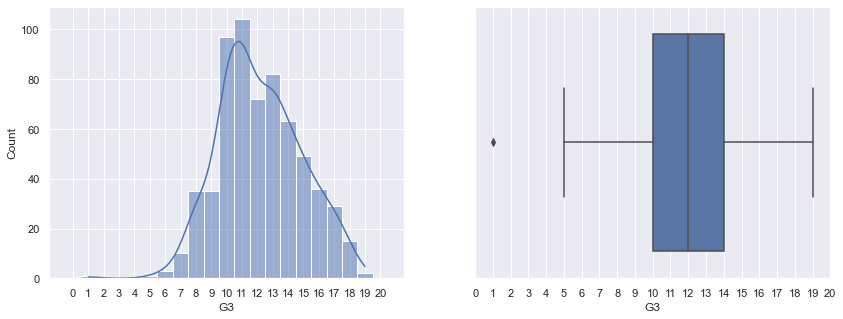

In [65]:
#comincio disegnando un istrogramma e un boxplot per visualizzare la distribuzione dei voti finali
fig, ax = plt.subplots(1,2,figsize=(14,5))

g = sns.histplot(data=df, x="G3", binwidth=0.5, binrange=(0, 20), discrete=True, kde=True,ax=ax[0])
g.set_xticks([x for x in range(0,21,1)])

h = sns.boxplot(data=df, x="G3", ax=ax[1])
h.set_xticks([x for x in range(0,21,1)])
plt.show()

In [8]:
#stampo una tabella contenente alcune statistiche interessanti
pd.DataFrame(df["G3"].describe()) 

,G3
count,649.000000
mean,11.906009
std,3.230656
min,0.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,19.000000


L'istogramma ci mostra una distribuzione normale, leggermente distorta a sinistra (forse a causa di possibili outlier sul valore 0). <br>
Il boxplot sembra confermare la presenza degli outlier sullo 0 ed evidenzia come la mediana sia sul 12 e la maggioranza dei casi rientri tra il 10 e il 14 (range interquartile). <br>
La tabella statistica conferma quanto appena detto. Possiamo inoltre notare che la mediana è praticamente uguale alla media (circa 12) e la deviazione standard è di circa 3 voti.

Trovo strano che degli studenti abbiano preso 0. Vado a vedere nel dettaglio:

### 2.2. Analisi dei voti uguali a  0 <a href="anchor" id="section2.2"> </a>

In [9]:
zeros = df[df["G3"]==0]
zeros

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
163,GP,M,18,U,LE3,T,1,1,other,other,course,mother,1,1,2,no,no,no,no,yes,no,yes,yes,2,3,5,2,5,4,0,11,9,0
440,MS,M,16,U,GT3,T,1,1,at_home,services,home,mother,2,2,0,no,yes,no,yes,yes,yes,no,yes,5,4,5,4,5,3,0,7,0,0
519,MS,M,16,R,GT3,T,2,1,other,services,reputation,mother,2,2,0,no,no,no,yes,yes,yes,yes,no,5,2,1,1,1,2,0,8,7,0
563,MS,M,17,U,GT3,T,2,2,other,other,course,mother,1,1,1,no,no,no,yes,yes,yes,no,yes,1,2,1,2,3,5,0,7,0,0
567,MS,M,18,R,GT3,T,3,2,services,other,course,mother,1,1,1,no,no,no,no,yes,no,yes,no,2,3,1,2,2,5,0,4,0,0
583,MS,F,18,R,GT3,T,2,2,other,other,other,mother,2,1,1,no,no,no,no,yes,no,yes,yes,5,5,5,1,1,3,0,8,6,0
586,MS,F,17,U,GT3,T,4,2,teacher,services,home,mother,1,2,0,yes,yes,no,yes,yes,yes,yes,no,5,5,5,1,3,5,0,8,8,0
597,MS,F,18,R,GT3,T,2,2,at_home,other,course,mother,3,2,1,no,no,no,yes,yes,yes,no,yes,4,3,3,1,1,4,0,9,0,0
603,MS,F,18,R,LE3,A,4,2,teacher,other,reputation,mother,1,2,0,no,no,no,yes,yes,yes,yes,yes,5,3,1,1,1,5,0,5,0,0
605,MS,F,19,U,GT3,T,1,1,at_home,services,other,father,2,1,1,no,no,no,no,yes,no,no,no,5,5,5,2,3,2,0,5,0,0


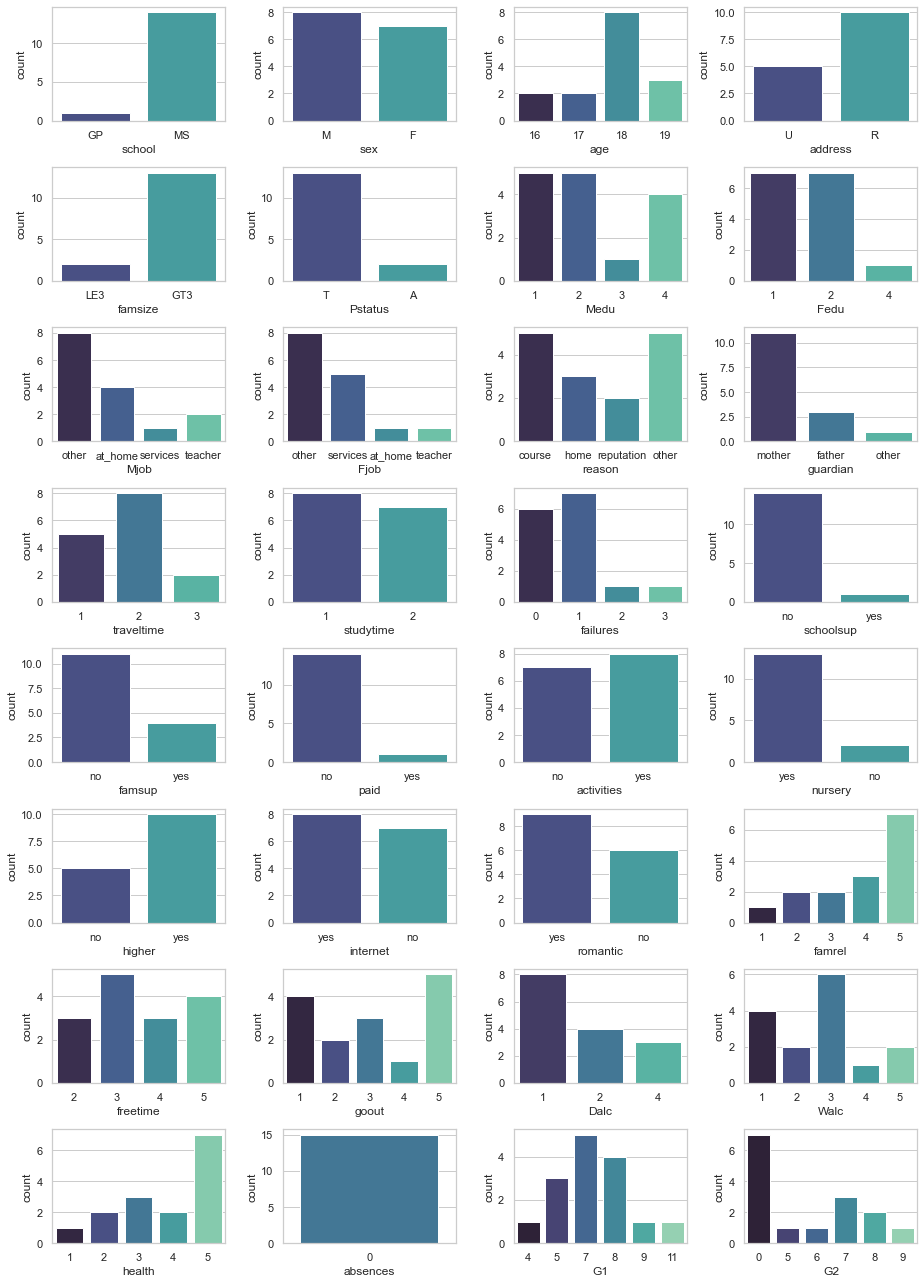

In [10]:
#disegno dei grafici che rappresentino il conteggio di ogni valore
i=1
plt.figure(figsize=(13,18))
for col in zeros.columns:
    if col != "G3":
        plt.subplot(8,4,i)
        sns.countplot(data=zeros, x=col, palette="mako")
        plt.tight_layout()
        i+=1

Noto delle caratterstiche in comune: <br><br>
-<b><u>tutti i casi registrano 0 assenze</u></b><br>
-tutti i voti G2 sono insufficienti<br>
-tutti i voti G1 sono insufficienti, escluso un 11 (appena sufficiente) che però è diventato 9 nel periodo successivo<br>
-appartengono quasi tutti alla scuola "MS".<br>
-dedicano tutti poco tempo allo studio (in una scala da 1 a 5, nessuno oltre il 2) <br>
-in quasi tutti i casi i genitori vivono insieme (Pstatus=T) <br>
-in quasi tutti i casi il nucleo famigliare è composto da più di 3 persone (famsize=GT3) <br>
-quasi nessuno paga per lezioni extra (paid=no) <br>
-quasi nessuno ha un supporto extrascolastico (schoolsup=no)

Queste considerazioni mi portano a pensare che non abbiano preso veramente 0 ma che invece siano studenti che si sono ritirati prima della fine dell'anno o che non hanno superato gli esami precedenti.

Dato che 0, quindi, non è un vero voto e poichè la predizione di un voto è una task di <b> <i> regressione </i> </b>, elimino le righe che presentano lo 0.

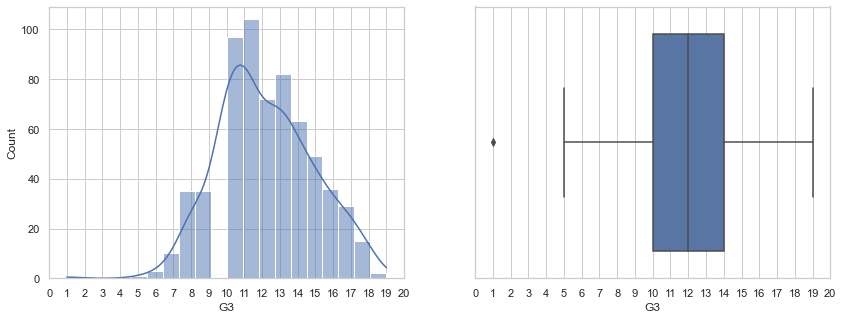

In [11]:
#tengo solo i voti maggiori di 0
df = df[df["G3"] > 0]

#disegno nuovamente istogramma e boxplot per osservare modifiche su media e mediana

fig, ax = plt.subplots(1,2,figsize=(14,5))

g = sns.histplot(data=df, x="G3", kde=True, ax=ax[0])
g.set_xticks([x for x in range(0,21,1)])

b = sns.boxplot(data=df, x="G3", ax=ax[1])
b.set_xticks([x for x in range(0,21,1)])

plt.show()

Rimane un outlier sul valore 1.

In [12]:
df[df["G3"] == 1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
172,GP,M,16,U,GT3,T,3,3,other,services,course,father,1,2,1,no,yes,no,no,yes,yes,yes,yes,4,5,5,4,4,5,0,10,10,1


Dando una breve occhiata si vede che il ragazzo studia poco, fa uso di alcol ed esce spesso. Il voto è plausibile.

In [13]:
pd.DataFrame(df["G3"].describe())

,G3
count,634.000000
mean,12.187697
std,2.691824
min,1.000000
25%,10.000000
50%,12.000000
75%,14.000000
max,19.000000


Media e mediana rimangono praticamente uguali, diminuisce leggermente la deviazione standard.

Ritorno al dataset completo e studio la distribuzione delle altre feature numeriche

### 2.3. Studio della distribuzione e delle correlazioni tra features <a href="anchor" id="section2.3"> </a>

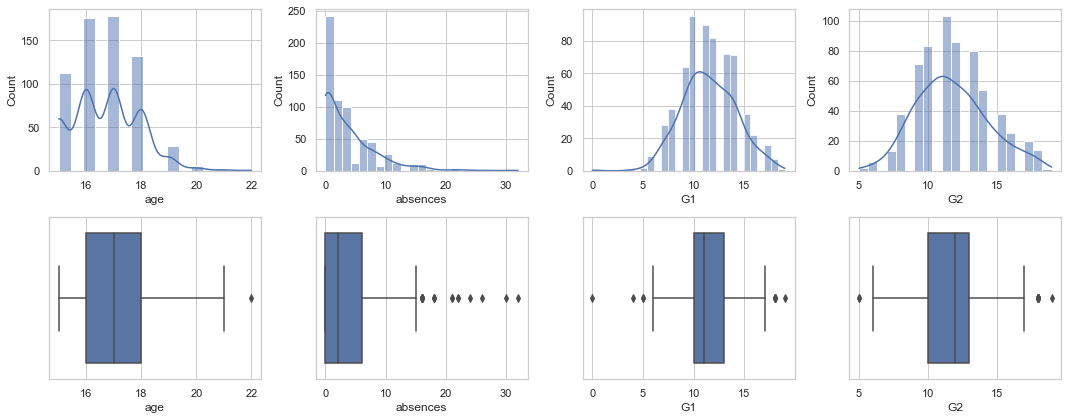

In [14]:
#disegno istogrammi e boxplot delle altre features numeriche ad eccezione di "failures" che analizzerò singolarmente

i = 1
plt.figure(figsize=(15,6))
for feature in num:
    if feature != "G3" and feature != "failures" :
        plt.subplot(2,4,i)
        sns.histplot(data=df, x=feature, kde=True)
        plt.subplot(2,4,i+4)
        sns.boxplot(data=df, x=feature)
        plt.tight_layout()
        i+=1

Per "age" il kde è fuorviante, la distribuzione, pur avendo pochi valori, è normale con degli outlier per i valori 21-22. <br>
La distribuzione di "absences" è asimmetrica positiva (ha la "coda sulla destra") e contiene molti outlier per i valori superiori a 16, mentre "G1" e "G2" presentano distribuzioni normali (G1  leggermente distorto sinistra), entrambi con outliers per valori inferiori a 6 e superiori a 17.

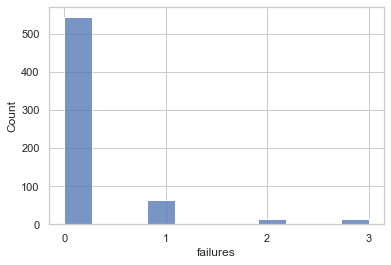

In [15]:
# il grafico delle bocciature lo disegno a parte poichè contiene solo 4 valori, perciò è un po' particolare

sns.histplot(data=df, x="failures").set_xticks([0, 1, 2, 3])
plt.show()

Quasi tutti gli studenti non sono mai stati bocciati.

Studio la correlazione tra le features numeriche:

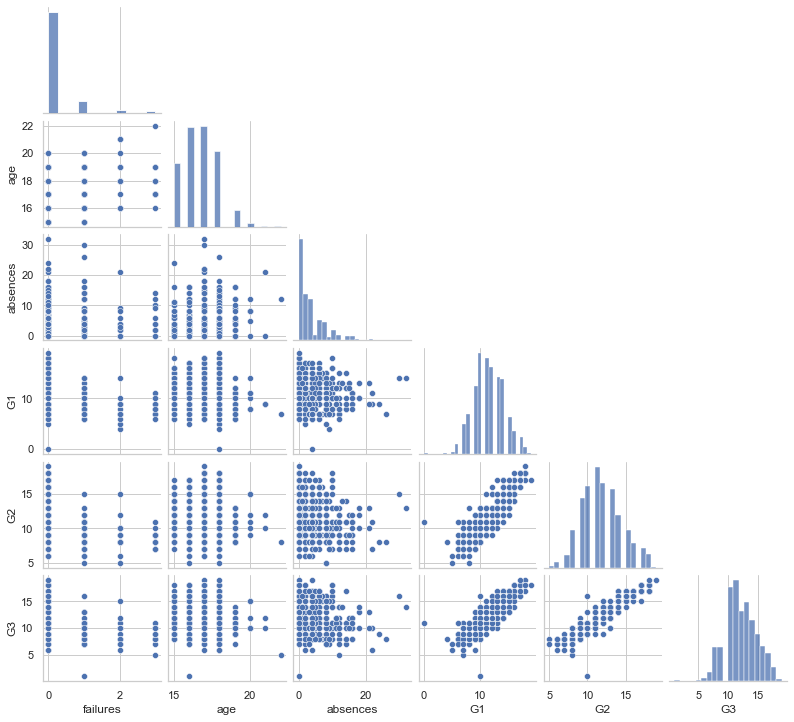

In [16]:
#per prima cosa disegno un pairplot che creerà una serie di scatterplot, uno per ogni combinazione di features
sns.pairplot(df[num], height=1.7, aspect=1.1, corner=True)

Possiamo notare subito una chiara correlazione tra i voti di ogni trimestre. <br>
I grafici creati con la combinazione di <b>assenze</b> e <b>voti finali</b> sembrano assumere un curioso pattern a triangolo: in particolare per G1, all'aumentare delle assenze il voto migliore si abbassa mentre quello peggiore resta uguale o si alza leggermente, riducendo la varianza. <br>
Dall'età si nota che la maggior parte degli studenti che superano l'età dei 18 anni prenda voti bassi.<br>
Infine, si vede chiaramente che i voti più alti vengono presi dagli studenti che non sono mai stati bocciati.

Ora creo una heatmap contenente i valori esatti delle correlazioni. I punteggi sono calcolati usando l'<b> indice di correlazione di Pearson </b> che determina la covarianza tra variabili.<br>
I punteggi più vicini all'1 indicheranno una forte correlazione <i> positivia </i>, ovvero all'aumentare del valore di una features aumenterà anche il valore dell'altra features. Viceversa, punteggi vicini al -1 indicheranno una correlazione <i> negativa </i> (all'aumentare del valore di una feature diminuirà il valore dell'altra). <br>
Punteggi vicini allo 0 indicano assenza di correlazione.

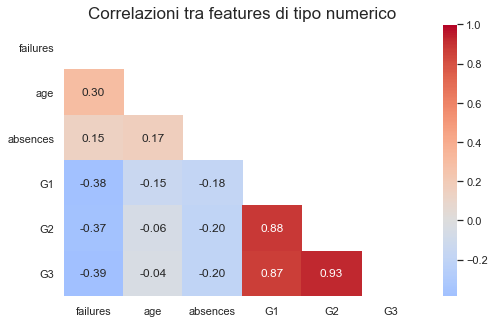

In [17]:
#creo una tabella con i valori delle correlazioni
#il metodo "corr()" usa di default il coefficiente di Pearson per studiare la covarianza tra features
corr = df[num].corr()

#creo la maschera che renderà il grafico visivamente più gradevole
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(8,5))
cmap = sns.color_palette("coolwarm", as_cmap=True)

hm = sns.heatmap(corr, mask=mask, cmap=cmap, center=0, vmax=1, annot=True, fmt='.2f')
hm.axes.set_title("Correlazioni tra features di tipo numerico",fontsize=17)
plt.show()

C'è una forte correlazione tra i voti, le altre correlazioni sono praticamente nulle.

Poichè G1 e G2 hanno una forte correlazione (0.88) posso eliminarne uno: scelgo di tenere G2 perchè ha una correlazione più forte con G3 (il target).

In [18]:
df = df.drop("G1", axis=1)

num.remove("G1") #elimino anche il valore nella lista delle features numeriche

df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13,13


Passo all'analisi delle features ordinali.

Studio la varianza del voto finale in base ad ogni valore delle features ordinali

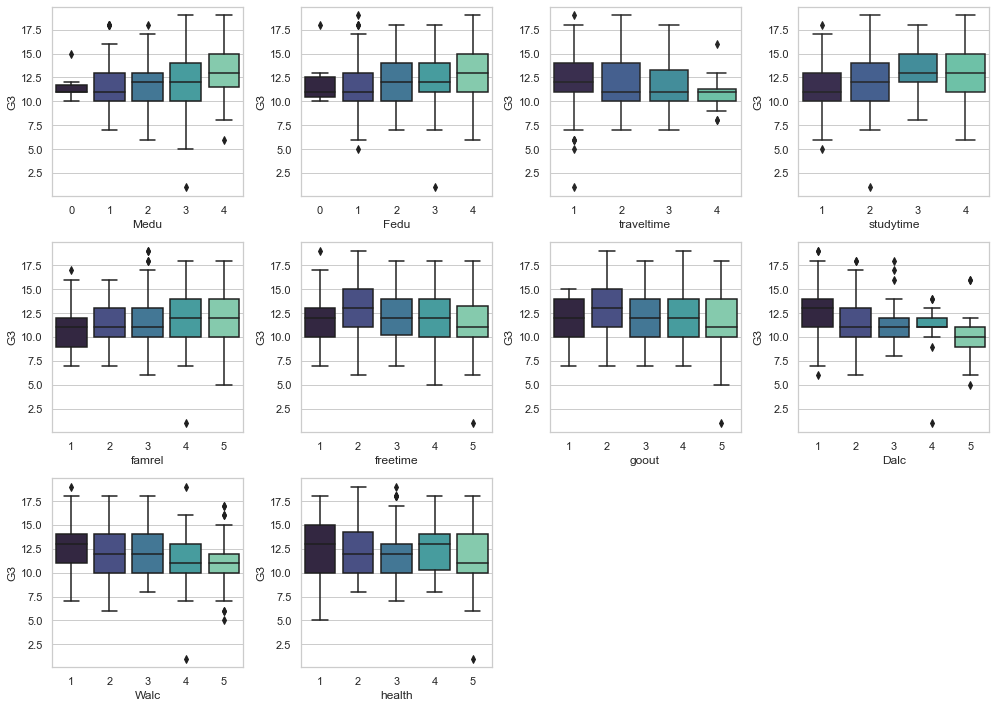

In [19]:
i=1
plt.figure(figsize=(14,10))
for col in cat_ord:
    plt.subplot(3,4,i)
    sns.boxplot(data=df, x=col, y="G3", palette="mako")
    plt.tight_layout()
    i+=1

Da questi grafici si potrebbe affermare che, al fine della predizione di G3, le features più interessanti siano le seguenti: <br>

-<b>Medu/Fedu:</b> il valore 0 comporta un range interquartile molto stretto (quindi poca varianza), molto importante per la predizione. All'aumentare del valore il range si allarga ma si alzano la mediana ed i voti in generali. <br>

-<b>Studytime:</b> vediamo che la mediana dei voti di chi studia meno è nettamente pù bassa di chi studia di più.

-<b>Dalc:</b> stessa considerazione di "Medu" (all'inverso) ma varianza più ridotta per i valori da 3 a 5. In particolare, il valore 4  ha un range completamente diverso dagli altri e ci dice che la maggior parte degli studenti che prendi voti bassissimi ha questo valore per Dalc (consuma quindi molto alcol nei giorni feriali).<br>

-<b>Walc:</b> varianza piuttosto ampia ma visibile peggioramento dei voti più alti e abbassamento della mediana all'aumentare del consumo di alcolici nel weekend. 

Lo studio della varianza appena effettuato potremmo riprodurlo in modo più "compatto" usando il metodo statistico <b> ANOVA </b>. <br>
ANOVA (<b>AN</b>alysis <b>O</b>f <b>VA</b>riance) è un insieme di tecniche statistiche che permettono di confrontare due o più gruppi di dati confrontando la variabilità interna a questi gruppi con la variabilità del target.

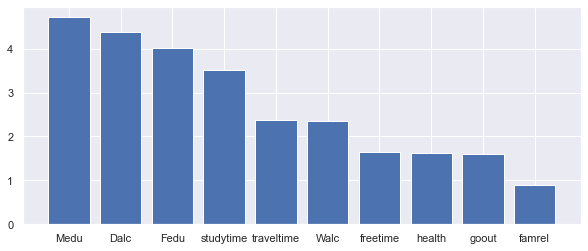

In [20]:
from sklearn.feature_selection import f_classif # ANOVA con sklearn
from sklearn.feature_selection import SelectKBest

X, y = df[cat_ord], df["G3"]  # separo le features ordinali dal target
fs = SelectKBest(score_func=f_classif, k=10)  # preparol il "selezionatore"
fs.fit(X, y)

# creo un df con i punteggi del test
anova_score = pd.DataFrame(fs.scores_, index=df[cat_ord].columns, columns=["Anova_Score"])
anova_score = anova_score.sort_values(by="Anova_Score", ascending=False)

# visulaizzo con un grafico a barre quali sono le feature più influenti
sns.set()
plt.figure(figsize=(10, 4))
plt.bar(x=anova_score.index, height=anova_score["Anova_Score"])
plt.show()

ANOVA conferma che, prese singolarmente, le features più influenti sono Medu, Dalc, Fedu, Studytime.

In [21]:
#annoto in una lista le features che ritengo importanti:
imp_feat = ["Medu", "Fedu", "studytime", "failures", "Dalc", "Walc", "absences", "G2"] 
#ho aggiunto anche le assenze, le bocciature e G2 di cui abbiamo visto l'importanza in precedenza

Creo ora una funzione da applicare a "new_df" per cui per ogni valore di ogni features viene calcolata la ripartizione percentuale di insufficienti, sufficienti e ottimi e, dopodichè, disegna un grafico a barre o linee per la rappresentazione. <br>
Mi spiegherò meglio con un esempio.

In [22]:
from matplotlib.ticker import MaxNLocator
def percentage_chart(data, feature, palette="crest", kind="bar"):
    xx = pd.crosstab(data[feature], data["G3"]).reset_index()
    xx = xx.set_index(feature)
    xx = xx.apply(lambda x:x/x.sum()*100, axis=1).reset_index()
    xx = pd.melt(xx, id_vars=feature, var_name="G3")
    
    if kind=="bar":
        sns.barplot(data=xx, x=feature, y="value", hue="G3", palette=palette).set(
                ylabel="percenage of the total%")
        
    elif kind=="line":
        sns.lineplot(data=xx, x=feature, y="value", hue="G3", palette=palette).set(
                ylabel="percenage of the total%")
        plt.locator_params(axis="x", nbins=5)
        
    else:
        raise ValueError

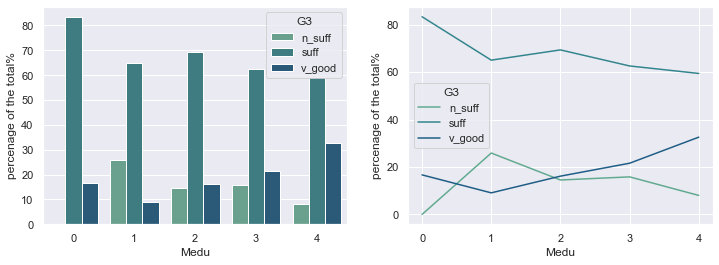

In [23]:
#ESEMPIO con la feature "Medu"
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
percentage_chart(new_df, "Medu", kind="bar")

plt.subplot(1, 2, 2)
percentage_chart(new_df, "Medu", kind="line")

plt.show()

-Per il valore 0 di Medu, più dell'80% degli studenti ottiene una sufficienza, il restante 20% circa è insufficiente (quindi nessuno prende voti alti). <br>
-Per il valore 1 il 25% degli studenti prende un'insufficienza, il 65% una sufficienza e il 10% un voto alto. <br>
E così via per ogni valore.
Vorrei evidenziare che i calcoli vengono effettuati su ogni singolo valore della feature, per cui la somma di insuff+suff+v_good dà sempre il 100%. <br>

Uso questa funzione per analizzare le feature ordinali. <br>
In particolare cerco una correlazione per cui all'aumentare dei valori della feature aumentino i voti alti e contemporaneamente si abbassino le insufficienze (o viceversa, avendo sempre una reazione inversa tra voti alti e insufficienze).

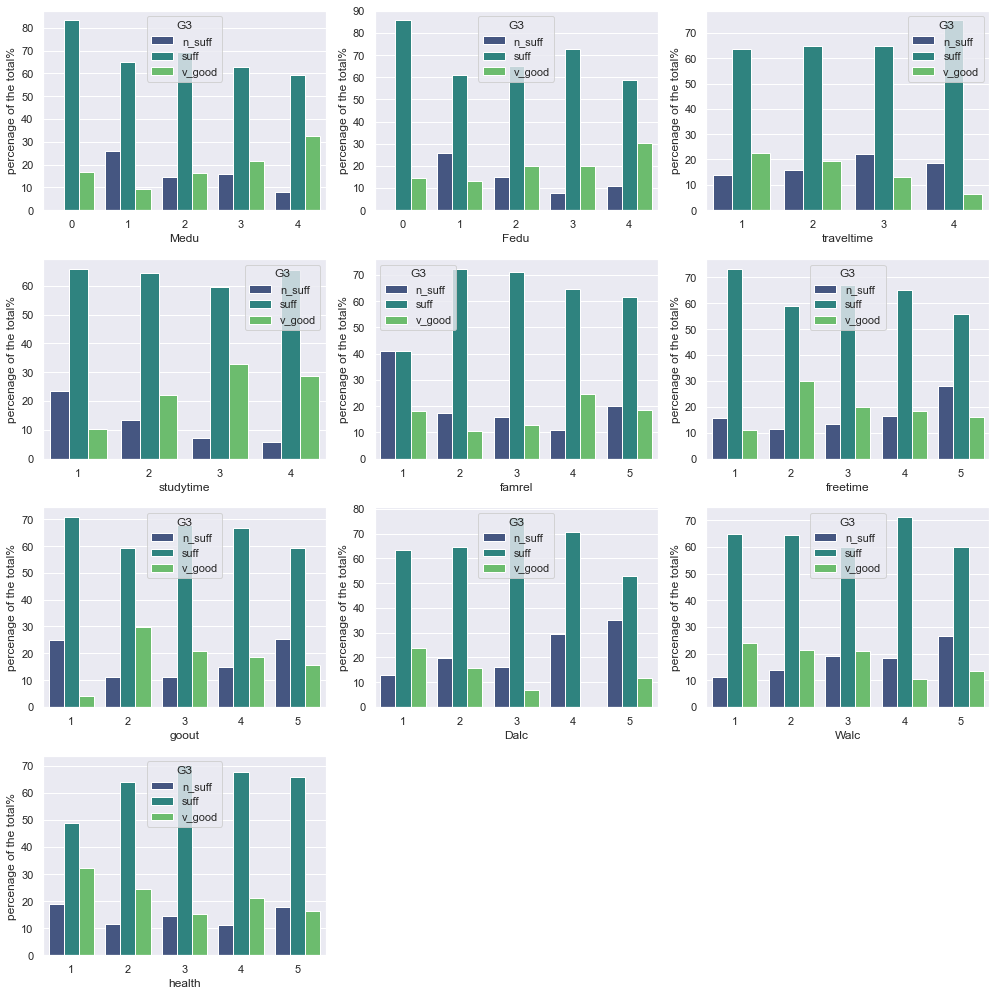

In [24]:
i=1
plt.figure(figsize=(14,14))
for col in cat_ord:
    plt.subplot(4, 3, i)
    percentage_chart(new_df, col, palette="viridis")
    plt.tight_layout()
    i+=1

Disegno dei grafici a linee per vedere più chiaramente l'andamento e confermare l'importanza delle features scelte in precedenza:

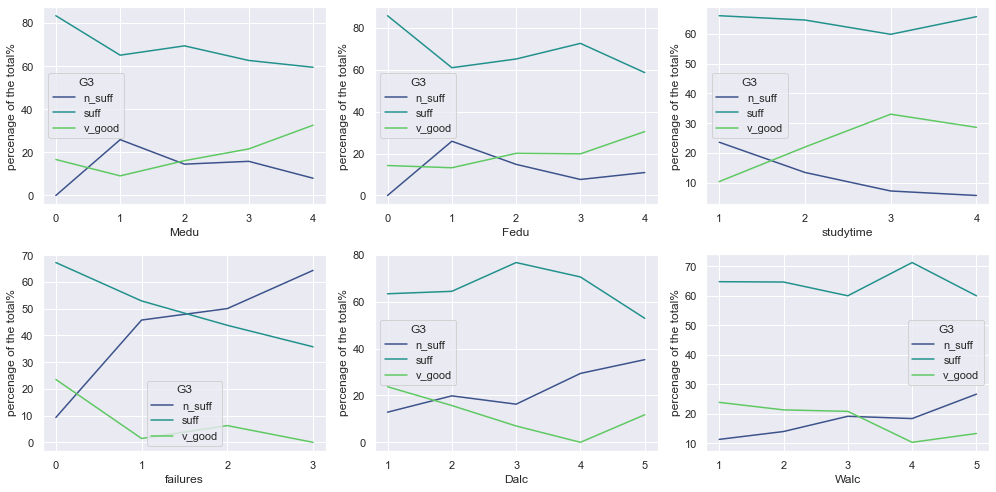

In [25]:
i=1
plt.figure(figsize=(14,7))
for col in imp_feat:
    if col != "G2" and col != "absences":
        plt.subplot(2, 3, i)
        percentage_chart(new_df, col, palette="viridis", kind="line")
        plt.tight_layout()
        i+=1
        
plt.show()

Le affermazioni precedenti sembrano essere confermate.

Passo all'analisi delle features binarie:

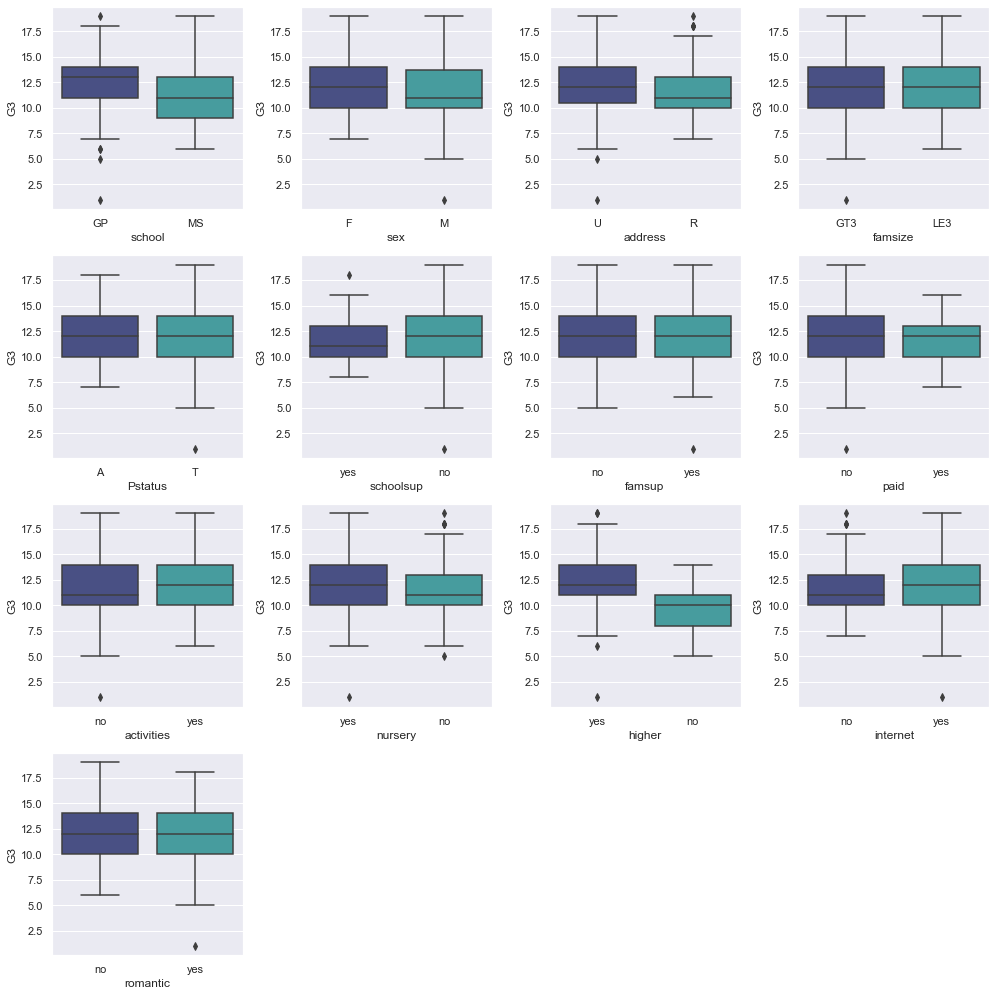

In [26]:
#studio la varianaza di G3 per i valori di ogni feature attraverso dei boxplot

i=1
plt.figure(figsize=(14,14))
for col in binary:
    plt.subplot(4,4,i)
    sns.boxplot(data=df, x=col, y="G3", palette="mako")
    plt.tight_layout()
    i+=1

Per le features binarie è più facile identificare le differenze tra valori, quelle che mostrano differenze più nette:<br>
-School<br>
-Higher<br>

In [27]:
imp_feat.extend(["school", "higher"])

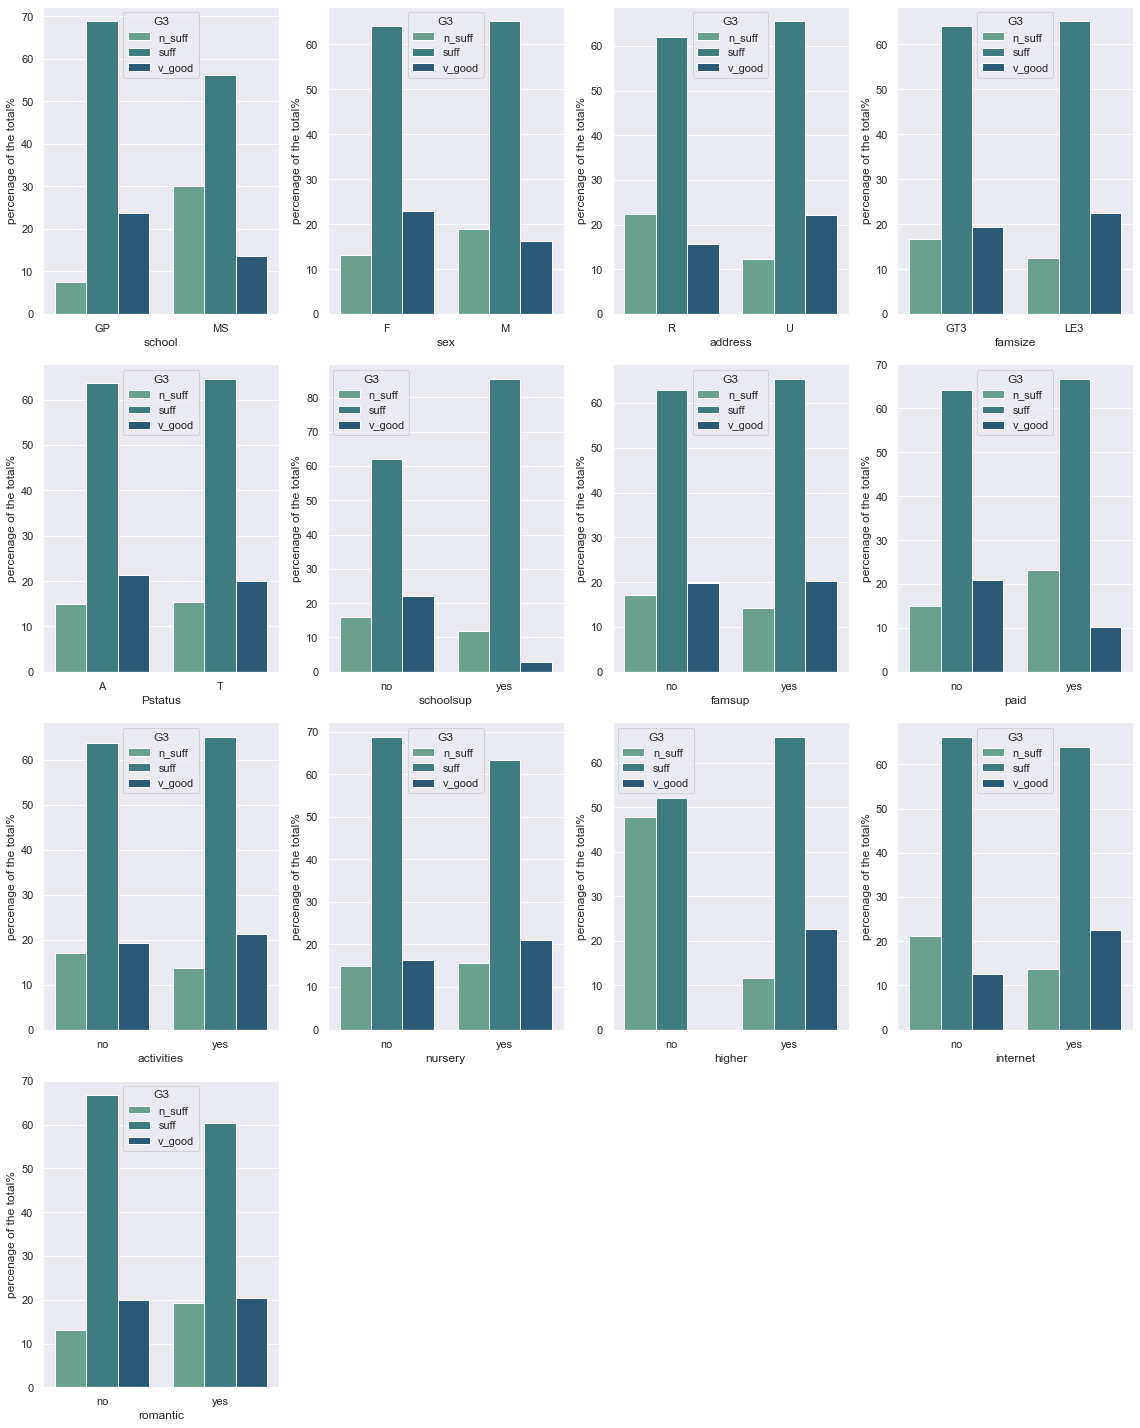

In [28]:
#uso di nuovo la funzione creata
i=1 
plt.figure(figsize=(16,20))
for col in binary:
    plt.subplot(4,4, i)
    percentage_chart(new_df, col)
    plt.tight_layout()
    i=i+1

Il dato che più mi impressiona è quello che riguarda la volontà di continuare gli studi: quasi il 50% degli studenti che dichiara di non voler andare all'università ottiene un voto insufficiente e nessuno di loro ottiene un voto alto! <br><br>
Come già visto prima, anche la scuola determina una fattore importante: il 30% degli studenti MS ottiene un'insufficienza, contro l'8% circa della scuola GP.<br>
Un'altra osservazione interessante riguarda "schoolsup": gli studenti che ricevono supporto extrascolastico ricevono un'insufficienza solo nel 10% dei casi ma la percentuale di voti alti è molto inferiore alla percentuale di chi non riceve extra supporto (3% circa contro 21%!).

Infine analizzo le features nominali:

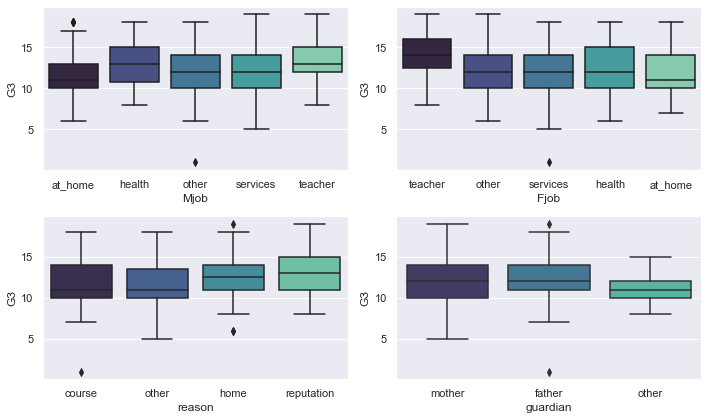

In [29]:
i=1     
plt.figure(figsize=(10,6))
for col in cat_qual:
    plt.subplot(2,2, i)
    sns.boxplot(data=df, x=col, y="G3", palette="mako")
    plt.tight_layout()
    i=i+1

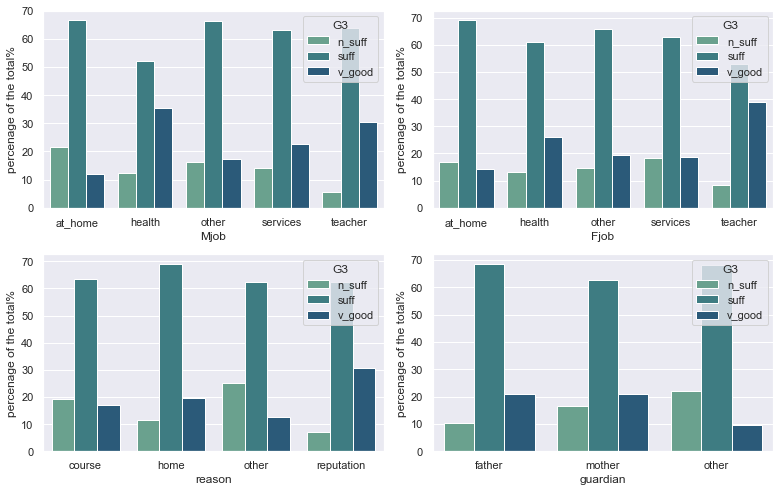

In [30]:
i=1
plt.figure(figsize=(11,7))
for col in cat_qual:
    plt.subplot(2,2, i)
    percentage_chart(new_df, col)
    plt.tight_layout()
    i=i+1

Una grossa percentuale di chi ha i genitori che lavorano nella sanità o nell'istruzione prende voti alti.

Quando sarà il momento di addestrare i modelli di apprendimento, queste features nominali dovranno essere convertite in numeri: per ogni valore di ogni variabile verrà creata una nuova feature col nome del valore stesso che conterrà solo 0 e 1 (cioè vero o falso). Anticipo questa trasformazione in modo da analizzare le nuove features:

In [31]:
df_dum = pd.get_dummies(df[cat_qual])
df = pd.concat([df.drop(cat_qual, axis=1), df_dum], axis=1)
#non ho usato get_dummies su tutto il df altrimenti avrebbe creato nuove colonne anche per le features binarie

df.head() 

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,G3,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,GP,F,18,U,GT3,A,4,4,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,11,11,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0
1,GP,F,17,U,GT3,T,1,1,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,11,11,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,GP,F,15,U,LE3,T,1,1,1,2,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,13,12,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
3,GP,F,15,U,GT3,T,4,2,1,3,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0
4,GP,F,16,U,GT3,T,3,3,1,2,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,13,13,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0


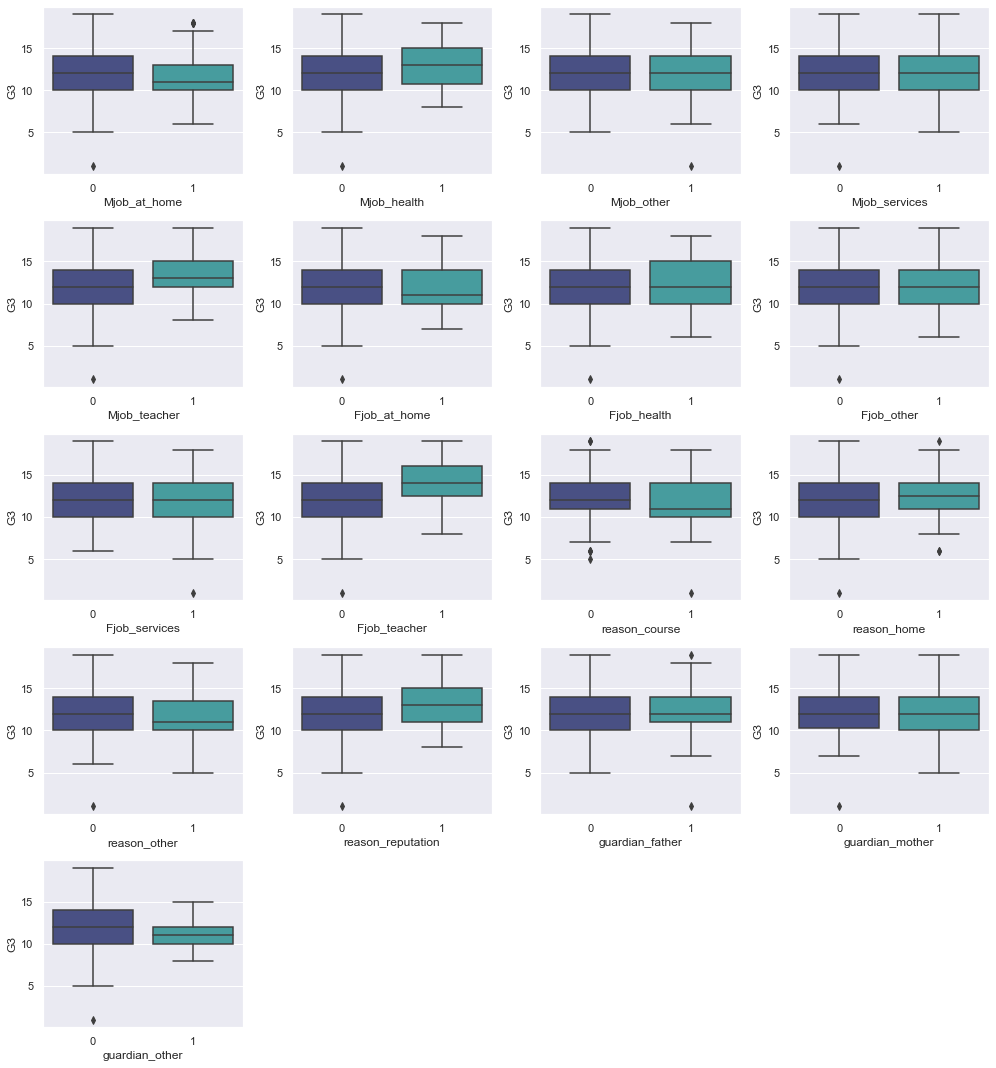

In [32]:
i=1
plt.figure(figsize=(14,15))
for col in df.columns:
    if "_" in col:
        plt.subplot(5,4,i)
        sns.boxplot(data=df, x=col, y="G3", palette="mako")
        plt.tight_layout()
        i+=1

Le features con più differenze tra i valori e/o varianza più bassa sono: <br>
-Mjob_health <br>
-Mjob_teacher <br>
-Fjob_teacher <br>
-Guardian_other

In [33]:
imp_feat.extend(["Mjob_health", "Mjob_teacher", "Fjob_teacher", "guardian_other"])

In [34]:
imp_feat

['Medu',
 'Fedu',
 'studytime',
 'failures',
 'Dalc',
 'Walc',
 'absences',
 'G2',
 'school',
 'higher',
 'Mjob_health',
 'Mjob_teacher',
 'Fjob_teacher',
 'guardian_other']

## 3. Machine Learning: creazione del modello predittivo <a href="anchor" id="chapter3">

### 3.1. Preprocessing <a href="anchor" id="section3.1"> </a>

In [35]:
#carico tutti i moduli di sklearn che mi serviranno

#preparazione dati:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split as split

#algoritmi:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

#metriche:
from sklearn.metrics import r2_score as r2 
#misura la forza di relazione tra il modello addestratato e la variabile dipendente
#va da 0 a 1 e quanto più si avvicina a 1 e migliore è il modello

from sklearn.metrics import mean_absolute_error as mae 
#media (sempre positiva) dell'errore commesso

from sklearn.metrics import mean_squared_error as mse 
#media quadratica dell'errore commesso. 
#punisce maggiormanete gli errori più grossi

from sklearn.metrics import make_scorer

#tuning degli iperparametri
from sklearn.model_selection import RandomizedSearchCV

#divisione del train test in train e validation da utilizzare con RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold #stratifica in base al voto degli studenti
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

import warnings
warnings.filterwarnings("ignore")

#separo i dati di addestramento dall'obbiettivo della previsione
X = df.drop("G3", axis=1)
y = df.loc[:, "G3"]
X_train, X_test, y_train, y_test = split(X, y, test_size=0.2, shuffle=True, random_state=0)


#preparo le metriche
r2_score = make_scorer(r2)
mae_score = make_scorer(mae)
mse_score = make_scorer(mse)
scores = {"r2":r2_score, "mae":mae_score, "mse": mse_score}

Come metriche terrò maggiormente in considerazione r2 perchè dà subito un'idea generale del risultato e MSE, poichè il range di risultati è molto ristretto (da 0 a 20) c'è bisogno che la predizione sia il più precisa possibile e MSE punisce maggiormente gli errori grossi.

In [36]:
#codifico le features binarie trasformandone i valori in 0 e 1
encoder = LabelEncoder()
for feature in binary:
    encoder.fit(X_train[feature])
    X_train[feature] = encoder.transform(X_train[feature])
    X_test[feature] = encoder.transform(X_test[feature])

In [37]:
# prima di scalare i dati, salvo i risultati di G2 per compararli alla predizione finale
G2 = X_test["G2"].copy()

#scalo i dati in modo da uniformare i valori di ogni features in un range tra 0 (il minimo) e 1 (il massimo)
scaler = MinMaxScaler()
scaler.fit(X_train)

# non sarebbe necessario ricreare il df, lo faccio solo per non perdere i nomi delle features nella trasformazione
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_train.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,0.0,1.0,0.285714,1.0,0.0,1.0,0.50,0.25,0.333333,0.000000,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.75,1.00,0.00,0.00,0.0,0.50,0.0,0.307692,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.142857,1.0,1.0,1.0,0.75,0.25,0.000000,0.333333,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.50,0.50,0.50,0.25,0.5,0.25,0.0,0.615385,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.285714,1.0,0.0,1.0,1.00,1.00,0.000000,0.666667,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.00,0.75,0.75,0.00,0.5,0.75,0.0,0.538462,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
X_test.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G2,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,1.0,0.0,0.285714,0.0,0.0,1.0,0.50,0.50,0.0,0.000000,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.00,0.00,0.50,0.0,0.25,1.00,0.15625,0.307692,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.285714,1.0,1.0,0.0,0.75,0.50,0.0,0.333333,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.75,0.75,0.75,0.0,0.25,1.00,0.31250,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,1.0,1.00,0.25,0.0,0.333333,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.00,0.50,0.75,0.0,0.25,0.25,0.00000,0.615385,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In realtà non tutti i modelli hanno bisogno della scalatura (come Random Forest, poichè non si basa sulle distanze) ma preferisco fare tutto il pre-processing in un'unica fase.

X_train è ora pronto per essere dato in pasto agli algoritmi.

Il valore da prevedere è numerico e discreto, si tratta quindi di un problema di <i> Regressione </i>. <br>
Userò 5 modelli: Random Forest (regressor), Ridge, KNN (regressor), SVR e XGBoost. <br><br>
Nella prima fase cercherò i migliori valori da assegnare agli iperparametri utilizzando <b>RandomizedSearchCV</b>: stabilirò un range di valori tra cui RandomizedSearch pescherà casualmente, applicherà al modello e restituirà gli scores ottenuti.<br><br>
Non verranno provati tutti i valori disponibili (come accade con GridSearch), ma questo comporta principalmente 2 vantaggi: <br>
<li>-Provando meno combinazioni di valori, ne consegue che il tempo computazionale è di gran lunga inferiore e non perderemo ore in attesa del risultato.
<li>-E' possibile, quasi paradossalmente, trovare il valore migliore in assoluto: questo perchè con GridSearch si possono provare una serie finita (e solitamente non troppo lunga) di valori, senza avere la certezza che tra questi ci sia il più performante. RandomizedSearch invece sceglie tra una lista di valori molto più vasta, aumentando le possibilità di trovare quello più idoneo.

### 3.2. Addestramento dei modelli <a href="anchor" id="section3.2"> </a>

#### 3.2.1 RANDOM FOREST <a href="anchor" id="section3.2.1"> </a>

In [39]:
#addestro per primo un random forest
model = RandomForestRegressor()

#preparo i valori dei parametri da validare
rf_params = [{"max_features": np.arange(1, len(X_train.columns)+1, 1), # n° massimo di features utilizzate
              "min_samples_split": np.arange(1, 11, 1)}]# n°minimo di campioni necessari per dividere un nodo
                
#faccio partire la ricerca
rf = RandomizedSearchCV(model, rf_params, 
                        scoring=scores, #calcolo il punteggio per ognuna delle metriche scelte in precedenza
                        refit="r2", #sceglie i valori che ottengono il miglior punteggio di r2 score
                        n_iter=30, #numero di combinazioni provate
                        cv=cv, n_jobs=-1, #numero di lavori eseguiti in parallelo (-1 significa tutti)
                        random_state=0, verbose=1)

#addestro il modello con gli iperparametri trovati
rf.fit(X_train, y_train)
print(f"R2 score: {rf.best_score_}, hyperparameters: {rf.best_params_}")

Fitting 3 folds for each of 30 candidates, totalling 90 fits
R2 score: 0.8521830837500927, hyperparameters: {'min_samples_split': 10, 'max_features': 32}


In [40]:
#creo una tabella contenente i punteggi ottenuti da ogni combinazione
rf_results = pd.DataFrame(rf.cv_results_)
rf_results.columns
rf_results = rf_results[["param_min_samples_split", "param_max_features", 
              "mean_test_mae", "mean_test_mse", "mean_test_r2"]]
rf_results = rf_results.sort_values(by="mean_test_r2", ascending=False)
rf_results.head(5) #visualizzo solo le prime 5

,param_min_samples_split,param_max_features,mean_test_mae,mean_test_mse,mean_test_r2
3,10,32,0.724193,1.075486,0.852183
9,9,32,0.742669,1.089090,0.850363
1,10,35,0.734754,1.089984,0.850329
12,7,39,0.736902,1.097193,0.849448
15,10,44,0.742124,1.097195,0.849336


I valori che massimizzano R2 sono quelli che ottengono il migior punteggio anche in MAE e MSE.

In [41]:
#creo una lista contentente i modelli che addestro
models = []
models.append(rf)

#### 3.2.2 RIDGE <a href="anchor" id="section3.2.2"> </a>

In [42]:
model = Ridge()
ridge_params = {"alpha": np.arange(0, 100, 0.05)} #regola la penalità applicata dalla regolarizzazione l2

#il modello è molto veloce perciò provo molte iterazioni
ridge = RandomizedSearchCV(model, ridge_params, scoring=scores, refit="r2", n_iter=500,
                               cv=cv, n_jobs=-1, random_state=0, verbose=1) 

ridge.fit(X_train, y_train)

print(f"R2score: {ridge.best_score_}, hyperparameters: {ridge.best_params_}")

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
R2score: 0.8544448385598736, hyperparameters: {'alpha': 0.2}


In [43]:
ridge_results = pd.DataFrame(ridge.cv_results_)
ridge_results.columns
ridge_results = ridge_results[["param_alpha", "mean_test_mae", "mean_test_mse", "mean_test_r2"]]
ridge_results = ridge_results.sort_values(by="mean_test_r2", ascending=False)
ridge_results.head(5)

,param_alpha,mean_test_mae,mean_test_mse,mean_test_r2
444,0.2,0.725594,1.059939,0.854445
358,0.05,0.726107,1.059885,0.854437
322,0.25,0.725839,1.060527,0.854369
121,0.3,0.726231,1.061379,0.854256
119,0.45,0.727812,1.065425,0.853711


C'è davvero pochissima differenza tra i risultati, sarebbero tutti ottimi valori da assegnare.

In [44]:
models.append(ridge)

#### 3.2.3. KNEIGHBORS <a href="anchor" id="section3.2.3"> </a>

In [66]:
model = KNeighborsRegressor()

#solitamente validerei solo "n_neighbors" ma a causa degli scarsi risultati ho provato ad aggiungere "weights" e "p"

knn_params = [{"n_neighbors": np.arange(1, 20, 1), # numero di campioni vicini da considerare
            "weights": ["uniform", "distance"], # "uniform" da lo stesso peso a tutti i campioni, "distance" da più importanza ai più vicini
            "p": [1,2]}] # tipo di distanza (1=Manatthan, 2=euclidea)

knn = RandomizedSearchCV(model, knn_params, scoring=scores, refit="r2", n_iter=76, 
                             cv=cv, n_jobs=-1, random_state=0, verbose=1)
knn.fit(X_train, y_train)
print(f"R2 score: {knn.best_score_}, hyperparameters: {knn.best_params_} ")

Fitting 3 folds for each of 76 candidates, totalling 228 fits
R2 score: 0.30050061358549746, hyperparameters: {'weights': 'distance', 'p': 1, 'n_neighbors': 11} 


In [46]:
knn_results = pd.DataFrame(knn.cv_results_)[["param_n_neighbors", "param_p", "param_weights",
                                                 "mean_test_mae", "mean_test_mse", "mean_test_r2"]]
knn_results = knn_results.sort_values(by="mean_test_r2", ascending=False)
knn_results.head(5)

,param_n_neighbors,param_p,param_weights,mean_test_mae,mean_test_mse,mean_test_r2
41,11,1,distance,1.775096,5.079713,0.300501
57,15,1,distance,1.780924,5.082671,0.300060
53,14,1,distance,1.782740,5.080808,0.300056
45,12,1,distance,1.776754,5.090462,0.298741
37,10,1,distance,1.772992,5.095158,0.298620


Purtroppo tutti pessimi risultati, viene provata ogni combinazione possibile ma senza successo.

In [47]:
models.append(knn)

#### 3.2.4. SVR <a href="anchor" id="section3.2.4"> </a>

In [48]:
model = SVR()

#KERNEL: funzione usata per mappare i dati in una dimensione superiore
#C: regola la quantità di errori accettati
#GAMMA (per kernel RBF): regola la curvatura dei margini limitando quindi l'influenza di ogni singolo campione 
#EPSILON: dimensione dello spazio ("tubo") in cui gli errori non pagano la penalità, dunque la soglia sull'errore accettabile
#DEGREE (per kernel POLY): grado delle funzione polinomiale

from scipy.stats import loguniform

svr_params = [{"kernel": ["linear"], "C": [loguniform(10e-3, 10e3)], 
               "epsilon": loguniform(10e-3, 10e3)},
              {"kernel": ["rbf"], "C": loguniform(10e-3, 10e3), "gamma": loguniform(10e-3, 10e3),
               "epsilon": loguniform(10e-3, 10e3)},
              {"kernel": ["poly"], "C": loguniform(10e-3,10e3), "degree": np.arange(1, 5, 1),
               "epsilon": loguniform(10e-3, 10e3)}]

svr = RandomizedSearchCV(model, svr_params, n_iter=100, n_jobs=-1, 
                         cv=cv, scoring=scores, refit="r2", verbose=1, random_state=0)
svr.fit(X_train, y_train)
print(f"R2 score: {svr.best_score_}, hyperparameters: {svr.best_params_}")

Fitting 3 folds for each of 100 candidates, totalling 300 fits
R2 score: 0.8604219945161359, hyperparameters: {'C': 24.611223231872025, 'degree': 1, 'epsilon': 0.39114424579932644, 'kernel': 'poly'}


In [49]:
svr_results = pd.DataFrame(svr.cv_results_)
svr_results.columns
svr_results = svr_results[["param_kernel", "param_C", "param_epsilon", "param_gamma", "param_degree",
                           "mean_test_mae", "mean_test_mse", "mean_test_r2"]]
svr_results = svr_results.sort_values(by="mean_test_r2", ascending=False)
svr_results.head(5)

,param_kernel,param_C,param_epsilon,param_gamma,param_degree,mean_test_mae,mean_test_mse,mean_test_r2
31,poly,24.6112,0.391144,NaN,1,0.718244,1.017594,0.860422
36,poly,33.0429,0.0976434,NaN,1,0.733062,1.065309,0.853600
89,rbf,1102.99,0.16951,0.0976682,NaN,0.909220,1.504199,0.793788
60,poly,214.948,1.55947,NaN,1,0.894538,1.502587,0.793394
69,poly,319.938,0.744166,NaN,2,0.931944,1.530521,0.789835


Le prime 2 combinazioni danno i risultati migliori.

In [50]:
models.append(svr)

#### 3.2.5. XGBoost <a href="anchor" id="section3.2.5"> </a>

In [51]:
from xgboost import XGBRegressor
from scipy import stats

model = XGBRegressor()

xgb_params = {'learning_rate': stats.uniform(0.01, 1), # regola i pesi assegnati ad ogni features ad ogni iterazione
              'subsample': stats.uniform(0.3, 1), # frazione di osservazioni da campionare per ogni albero
              'max_depth': np.arange(2, 10, 1), # numero massimo di nodi (profondità) di ogni albero
              'colsample_bytree': stats.uniform(0.5, 1), # frazione di colonne da campionare in modo casuale per ogni albero
              'min_child_weight': np.arange(1, 11, 1), # peso minimo richiesto per creare un nuovo nodo
              'gamma': stats.uniform(0.01, 1), # riduzione minima delle perdite necessarie a far crescere l'albero
              'reg_lambda': loguniform(10e-2, 10e2) # regola la penalità applicata dalla regolarizzazione l2
             }

xgb = RandomizedSearchCV(model, xgb_params, n_iter=100, n_jobs=-1, 
                         cv=cv, scoring=scores, refit="r2", verbose=0, random_state=0)

xgb.fit(X_train, y_train)
print(f"R2 score: {xgb.best_score_}, hyperparameters: {xgb.best_params_}")

R2 score: 0.8599173614839818, hyperparameters: {'colsample_bytree': 0.6716296772614405, 'gamma': 0.5310366062041293, 'learning_rate': 0.06433798833925362, 'max_depth': 2, 'min_child_weight': 5, 'reg_lambda': 0.48299918143820864, 'subsample': 0.7634509773844829}


In [52]:
xgb_results = pd.DataFrame(xgb.cv_results_)
xgb_results.columns
xgb_results = xgb_results[["param_learning_rate", "param_subsample", "param_max_depth", "param_colsample_bytree", 
                           "param_min_child_weight","param_gamma", "param_reg_lambda", 
                           "mean_test_mae", "mean_test_mse", "mean_test_r2"]]
xgb_results = xgb_results.sort_values(by="mean_test_r2", ascending=False)
xgb_results.head(5)

,param_learning_rate,param_subsample,param_max_depth,param_colsample_bytree,param_min_child_weight,param_gamma,param_reg_lambda,mean_test_mae,mean_test_mse,mean_test_r2
27,0.064338,0.763451,2,0.67163,5,0.531037,0.482999,0.714330,1.020692,0.859917
39,0.714474,0.504866,5,0.776894,10,0.184909,229.993,0.765620,1.144277,0.842519
10,0.830993,0.396098,2,0.696582,2,0.378725,224.791,0.764142,1.144420,0.842474
1,0.973663,0.828895,4,0.937587,2,0.901773,146.859,0.769647,1.174059,0.838606
9,0.254426,0.438183,9,0.753292,6,0.476311,42.2006,0.777518,1.183981,0.837128


Tutti risultati molto buoni.

In [53]:
models.append(xgb)

### 3.3. VALUTAZIONE DEI MODELLI ADDESTRATI <a href="anchor" id="section3.3"> </a>

##### Valuto ogni modello sui dati di test e creo una tabella contentente, per ogni modello, i punteggi delle varie metriche su train e test set

In [54]:
tab = []
for model in models:
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    r2_test = r2(y_test, test_pred)
    r2_train = r2(y_train, train_pred)
    
    mae_train = mae(y_train, train_pred)
    mae_test = mae(y_test, test_pred)
    
    mse_train = mse(y_train, train_pred)
    mse_test = mse(y_test, test_pred)
    
    tab.append([model.estimator, r2_train, mae_train, mse_train, " --- ", r2_test, mae_test, mse_test])
    
table = pd.DataFrame(tab, columns=["model", "r2_train", "mae_train", "mse_train", 
                                   " --- ", "r2_test", "mae_test", "mse_test"])
table

,model,r2_train,mae_train,mse_train,---,r2_test,mae_test,mse_test
0,RandomForestRegressor(),0.946651,0.430529,0.387301,---,0.890930,0.667658,0.777938
1,Ridge(),0.881877,0.661592,0.857534,---,0.887059,0.707376,0.805552
2,KNeighborsRegressor(),1.000000,0.000000,0.000000,---,0.279494,1.849657,5.139003
3,SVR(),0.877639,0.669296,0.888300,---,0.896077,0.674529,0.741228
4,"XGBRegressor(base_score=None, booster=None, co...",0.901985,0.614696,0.711556,---,0.896973,0.658690,0.734839


KNN ha overfittato clamorosamente, infatti prevede correttamente tutti i valori del train set ma sbaglia la maggior parte di quelli del test set. <br> 
Anche Random Forest ha un po' overfittato (i risultati di test sono inferiori ai risultati di train) ma ottinene comunque un buon punteggio. <br>
Gli altri modelli hanno appreso molto bene, restituendo ottimi risultati. In particolare spiccano <b> XGB </b> e <b>SVR </b>, con dei MAE e MSE molto bassi.

##### Disegno un grafico per confrontare visivamente i voti predetti con quelli reali:

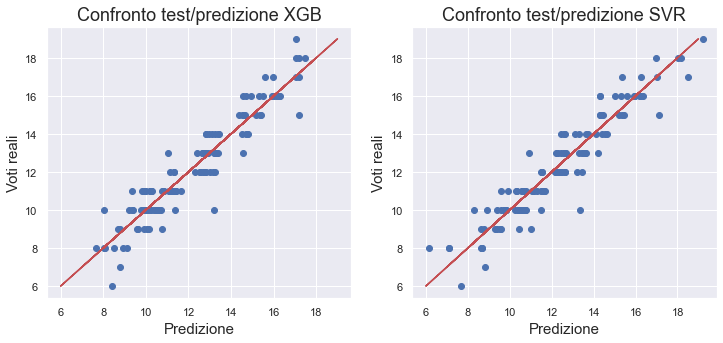

In [55]:
xgb_pred = xgb.predict(X_test)
svr_pred = svr.predict(X_test)


plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(xgb_pred, y_test)
plt.plot(y_test, y_test, c="r")
plt.title("Confronto test/predizione XGB", fontsize=18)

plt.xlabel("Predizione", fontsize=15)
plt.ylabel("Voti reali", fontsize=15)


plt.subplot(1,2,2)
plt.scatter(svr_pred, y_test)
plt.plot(y_test, y_test, c="r")
plt.title("Confronto test/predizione SVR", fontsize=18)

plt.xlabel("Predizione", fontsize=15)
plt.ylabel("Voti reali", fontsize=15)

plt.show()

Entrambi i modelli sembrano un po' "soffrire" i voti più bassi, infatti sono i punti che si allontanano di più dalla linea rossa. Ad ogni modo, è osservabile che le predizioni non si discostano mai più di tanto dai risultati veri. <br>
Posso quindi ritenermi soddisfatto dei risultati.

Per valutare che il modello abbia davvero imparato, confronto i risultati con quelli che avrei ottenuto con un modello "ingenuo", ad esempio un modello che predice sempre la media.

In [56]:
shape = y_test.shape
values = np.mean(y_test)
pred_mean = np.full(shape, values)

#come metrica uso mean squared error in modo da "punire" maggiormente gli errori più grossi
print("mse svr:", mse(y_test, svr.predict(X_test)))
print("mse mean:", mse(y_test, pred_mean))

mse svr: 0.7412284564277094
mse mean: 7.132494264988529


I risultati del modello addestrato sono nettamente superiori.

Poichè nello studio delle correlazioni è emerso che G2 fosse fortemente correlato a G3, provo a fare un confronto tra il modello addestrato ed un modello che predice lo stesso voto di G2:

In [57]:
print("mse svr:", mse(y_test, svr.predict(X_test)))
print("mse G2:", mse(y_test, G2))

mse svr: 0.7412284564277094
mse G2: 0.9763779527559056


Otteniamo un punteggio migliore, quindi il modello è riuscito ad imparare anche dalle altre features.

## 4. Ricerca delle features più importanti <a href="anchro" id="chapter4"> </a>

### 4.1. XGB Feature Importances <a href="anchor" id="section4.1"> </a>

Utilizzo l'attributo "feature_importances_" di XGB per scoprire quali sono state le features ad aver avuto un maggior impatto sulla predizione dei risultati: 

In [58]:
#prima devo riaddestrare manualmente XGB
xgb = XGBRegressor(colsample_bytree=0.67, gamma=0.53, learning_rate=0.06, 
                     max_depth=2, min_child_weight=5,
                     reg_lambda=0.48, subsample= 0.76)

xgb.fit(X_train, y_train)

#uso feature_importances_ e creo un dataframe che ne contiene i valori
xgb_imp_feat = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=["importance"])
xgb_imp_feat = xgb_imp_feat.sort_values(by="importance", ascending=False)
xgb_imp_feat.head(15)

,importance
G2,0.284473
failures,0.166550
higher,0.136230
Fjob_services,0.047621
internet,0.046229
Medu,0.030065
sex,0.021863
goout,0.020954
Walc,0.019955
Dalc,0.018417


In [59]:
top_xgb = xgb_imp_feat.index[:10]

#verifico quali features selezionate in fase di EDA sono effettivamente importanti per xgb
for feature in imp_feat:
    if feature in top_xgb:
        print(feature)

Medu
failures
Dalc
Walc
G2
higher


### 4.2. Ridge Coefficients <a href="anchor" id="section4.2"> </a>

I coefficienti che Ridge assegna ad ogni features indicano quanto quella features impatta sul modello. <br>
I valori assoluti più alti (quindi sia positivi che negatvi) indicano una maggiore influenza.

In [60]:
#riaddestro Ridge
ridge = Ridge(alpha=0.2)
ridge.fit(X_train, y_train)

#costruisco un dataframe contentente i valori dei coefficienti
coef = pd.DataFrame(ridge.coef_, index=X_train.columns, columns=["coef"])
coef = coef.sort_values(by="coef", ascending=False)

In [61]:
top = coef.head(6) #prendo i primi 6 valori più alti
bottom = coef.tail(6) #prendo gli 6 valori più bassi

#unisco le 2 selezioni contenenti i valori più importanti
imp_ridge = pd.concat([top, bottom]) 
imp_ridge

,coef
G2,11.500263
age,0.785353
traveltime,0.385040
higher,0.346745
Mjob_teacher,0.214456
Fjob_at_home,0.154523
goout,-0.199449
school,-0.200436
Fedu,-0.228124
absences,-0.347419


In [62]:
#anche per Ridge verifico se già in precedenza avevo individuato qualche features importante
for feature in imp_feat:
    if feature in imp_ridge.index:
        print(feature)

Fedu
failures
Dalc
absences
G2
school
higher
Mjob_teacher


In [63]:
#cerco quale feature è importate per entrambi i modelli ma non avevo considerato durante l'EDA:

for feature in top_xgb:
    if feature in imp_ridge.index and feature not in imp_feat:
        print(feature)

goout


Vediamo che, in linea generale, buona parte delle features più importanti erano già state individuate in fase di EDA.

Dai coefficienti di Ridge emerge una cosa interessante. <br>
Avevamo capito da subito che G2 fosse sicuramente la feature più importante, ma Ridge ci fa vedere nel dettaglio come, in pratica, per G3 venga predetto lo stesso voto di G2 "aggiustato" dalle altre features.

## Conclusioni <a href="anchor" id="chapter5"> </a>

Ritengo di aver costruito, con XGBoost un modello predittivo molto preciso, che ottiene uno errore quadratico medio di circa 0.74. <br>
Come intuito inizialmente in fase di analisi esplorativa, le caratteristiche che influenzano di più il voto finale sono:
<ul>
    <li> Voto G2 </li>
    <li> Scuola frequentata </li>
    <li> Bocciature </li>
    <li> Assenze </li>
    <li> Volontà di fare l'università </li>
    <li> Livello di educazione dei genitori </li>
    <li> Consumo di alcol </li>
    </ul>

Analizzando l'importanza che XGB e Ridge assegnano alle features, bisogna aggiungere alla lista:
    <ul>
    <li> Frequenza di uscite con gli amici</li>
    </ul>